## 2: Transfer Learning and Data Augmentation

### 2a. train a binary classifier with glioma and notumor

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import imageio.v2 as imageio
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from PIL import Image

C:\Users\sinad\anaconda3\envs\BMED6780_env\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [40]:
# Load the data:
directory = 'C:\\Users\\sinad\\OneDrive - Georgia Institute of Technology\\BMED 6780 - Med Image Processing\\Programming Practicals\\Practical 2\\BrainTumor'
dir_path = os.path.abspath(directory)
print("The Brain Tumor path is: ", dir_path)

The Brain Tumor path is:  C:\Users\sinad\OneDrive - Georgia Institute of Technology\BMED 6780 - Med Image Processing\Programming Practicals\Practical 2\BrainTumor


In [20]:
# List to store image file paths
image_files = []

# List to store labels
labels = []

# Loop through subfolders
for root, dirs, files in os.walk(directory):
    for dir_name in dirs:
        if dir_name in ['glioma', 'notumor']:
            subdir_path = os.path.join(root, dir_name)
            for file in os.listdir(subdir_path):
                if file.endswith('.jpeg') or file.endswith('.jpg') or file.endswith('.png'):
                    image_files.append(os.path.join(subdir_path, file))
                    labels.append(dir_name)

# Print the number of image files and labels
print("Number of image files:", len(image_files))
print("Number of labels:", len(labels))

Number of image files: 3621
Number of labels: 3621


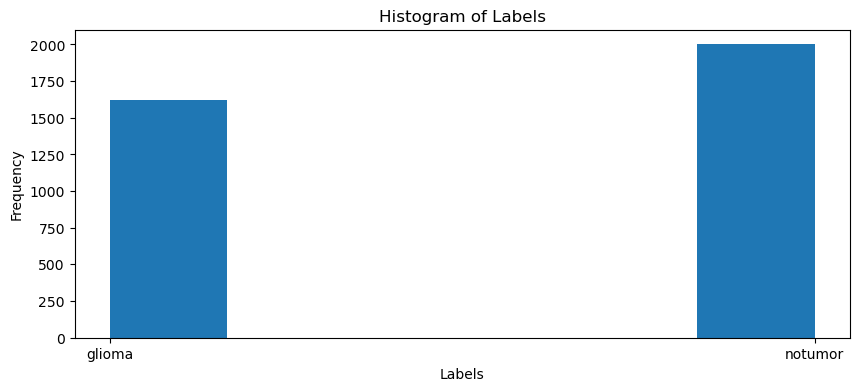

In [21]:
# Plot histogram of labels
plt.figure(figsize=(10, 4))
plt.hist(labels, bins=6)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Labels')
plt.show()

In [22]:
# Check for imbalance
unique_labels = set(labels)
label_counts = {label: labels.count(label) for label in unique_labels}
print("Label Counts:", label_counts)

Label Counts: {'notumor': 2000, 'glioma': 1621}


Te-noTr_0000.jpg
(236, 236, 3)
Te-glTr_0000.jpg
(512, 512, 3)


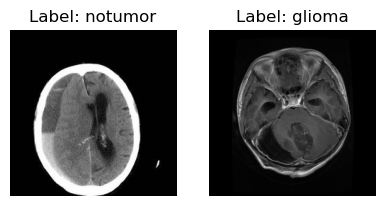

In [23]:
# Display an image from each label
plt.figure(figsize=(15, 10))
for i, label in enumerate(unique_labels):
    plt.subplot(1, 6, i+1)
    image_path = os.path.join(dir_path, [filename for filename in image_files if label in filename][0])
    print(image_path.split(sep="\\")[-1])
    img = imageio.imread(image_path)
    print(np.shape(img))
    plt.imshow(img)
    plt.title('Label: ' + label)
    plt.axis('off')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models

In [30]:
# Convert lists to numpy arrays
image_files = np.array(image_files)
labels = np.array(labels)

# Split the dataset into train and test sets
X_train_files, X_test_files, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=42)


# Extract features from images # Define a transformation to prepare images for the CNN model
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the input size required by the CNN model
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize pixel values
])

# Load a pre-trained CNN model (e.g., ResNet-18)
cnn_model = models.resnet18(pretrained=True)
cnn_model.eval()  # Set the model to evaluation mode

# Extract features from images using the CNN model
def extract_features(file_paths):
    features = []
    for file_path in file_paths:
        image = Image.open(file_path).convert('RGB')  # Ensure images are in RGB format
        image_tensor = transform(image).unsqueeze(0)  # Apply transformation and add batch dimension
        with torch.no_grad():
            feature = cnn_model(image_tensor).squeeze().numpy()  # Forward pass through the model and extract features
        features.append(feature)
    return np.array(features)

In [31]:
# Extract features from train and test images
X_train_features = extract_features(X_train_files)
X_test_features = extract_features(X_test_files)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')


In [32]:
svm_classifier.fit(X_train_features, y_train)

SVC(kernel='linear')

In [33]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_features)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9986206896551724
              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       347
     notumor       1.00      1.00      1.00       378

    accuracy                           1.00       725
   macro avg       1.00      1.00      1.00       725
weighted avg       1.00      1.00      1.00       725



In [44]:
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Subset

batch_size = 32
# Define the directories for train, validation, and test splits
train_dir = os.path.join(dir_path, 'Training')
test_dir = os.path.join(dir_path, 'Testing')

# Define the transform to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize pixel values
])

### 2b. Augmentation

In [51]:
# Image Classification
import torch
from torchvision.transforms import v2

transforms = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToImageTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [52]:
# Load the dataset from the Training folder
dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(test_dir, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% training, 20% validation
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

# Create DataLoader instances for each split
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### 2c. Model Definition and Training loop

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch.nn as nn
import torch.optim as optim

In [62]:
# Load the pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

# Freeze the convolutional layers
for param in model.parameters():
    param.requires_grad = False

C:\Users\sinad\anaconda3\envs\BMED6780_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sinad\anaconda3\envs\BMED6780_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [67]:

# Modify the fully connected layer to match the number of classes
num_classes = len(dataset.classes)
print(num_classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

4


In [ ]:
# Train the model
model.train()
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Evaluate the model
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Epoch 1, Loss: 0.65145357880559
Epoch 2, Loss: 0.3813024756166485
Epoch 3, Loss: 0.3373858545209978
Epoch 4, Loss: 0.32782605962528216
Epoch 5, Loss: 0.2987454211586839
Epoch 6, Loss: 0.2764594678903793


### 2.d: Performance on test split

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Obtain predicted labels
predicted_labels = predictions

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
